In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv('/content/drive/MyDrive/DM/ObesityDataSet.csv')

In [ ]:
# 1. Dataset Overview
print("Dataset Shape:", data.shape)
print("\nMissing Values:\n", data.isnull().sum())
print("\nData Types:\n", data.dtypes)

Dataset Shape: (2111, 17)

Missing Values:
 Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Data Types:
 Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                    

In [ ]:
# Display first few rows
print("\nFirst 5 Rows:\n", data.head())


First 5 Rows:
    Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transp

In [ ]:
# 2. Descriptive Statistics
print("\nDescriptive Statistics:\n", data.describe())


Descriptive Statistics:
                Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.

<ipython-input-10-efd57477a59b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="NObeyesdad", data=data, order=data["NObeyesdad"].value_counts().index, palette="viridis")


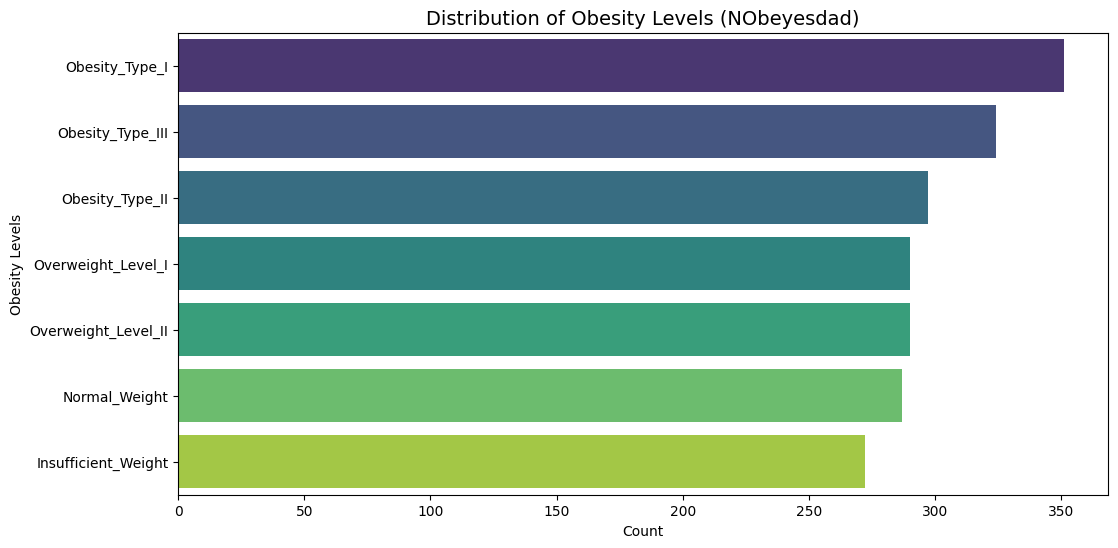

In [ ]:
# 3. Target Variable Analysis
plt.figure(figsize=(12, 6))
sns.countplot(y="NObeyesdad", data=data, order=data["NObeyesdad"].value_counts().index, palette="viridis")
plt.title("Distribution of Obesity Levels (NObeyesdad)", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Obesity Levels")
plt.show()

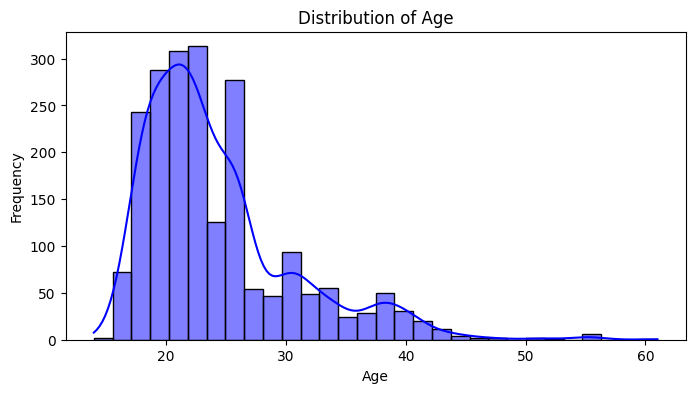

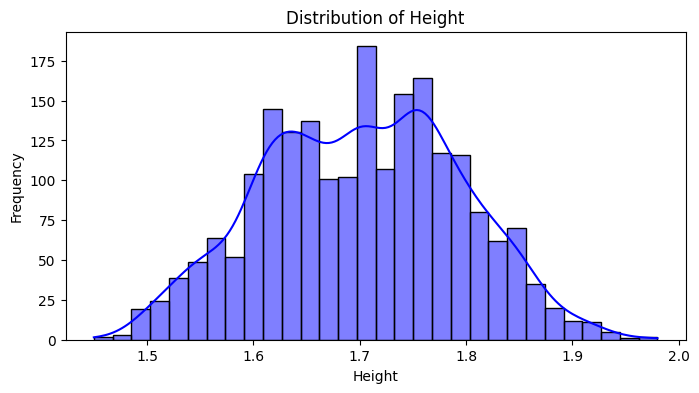

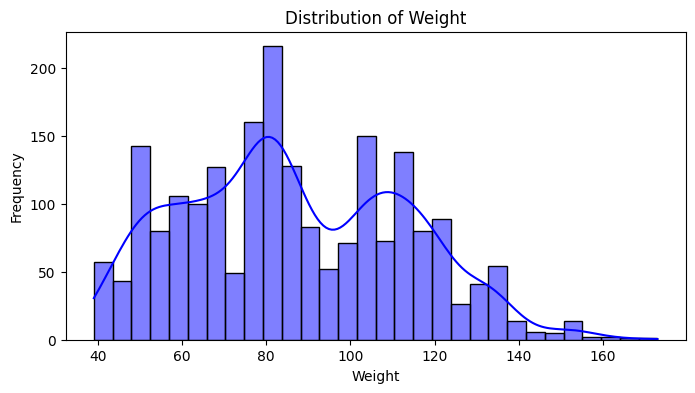

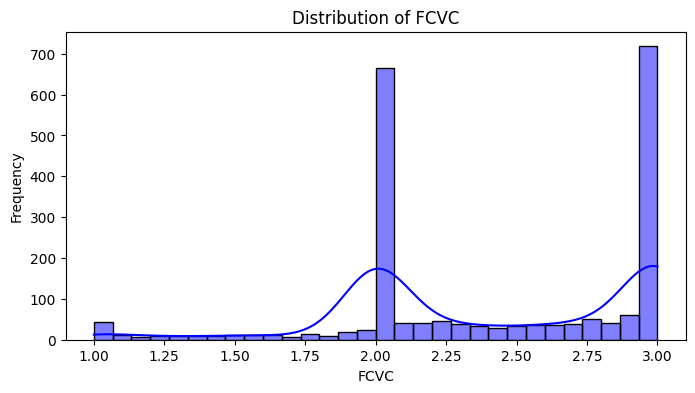

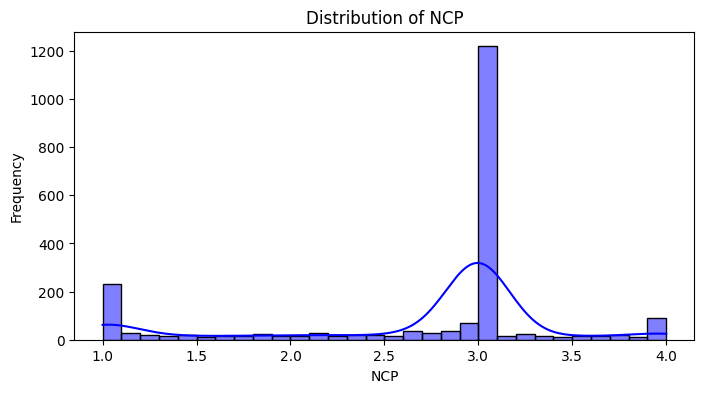

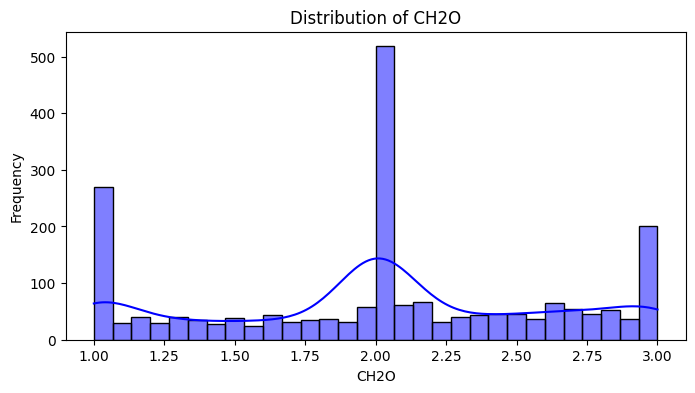

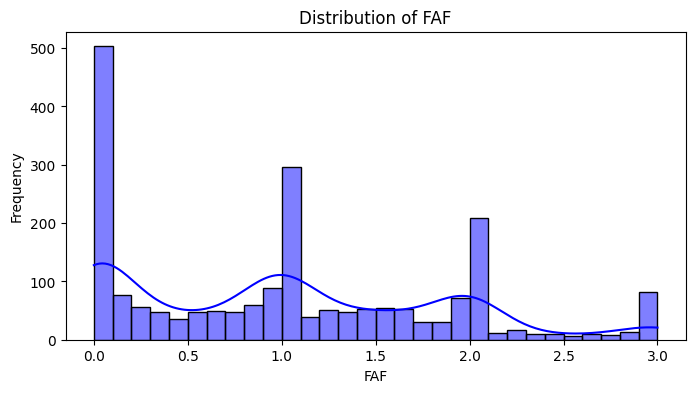

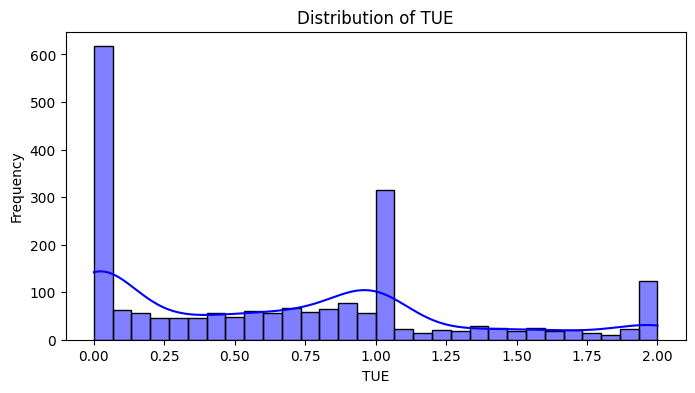

In [ ]:
# 4. Numerical Feature Analysis
numerical_features = data.select_dtypes(include=["float64"])
for column in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], kde=True, bins=30, color="blue")
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

<ipython-input-12-cac46f732777>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette="Set2")


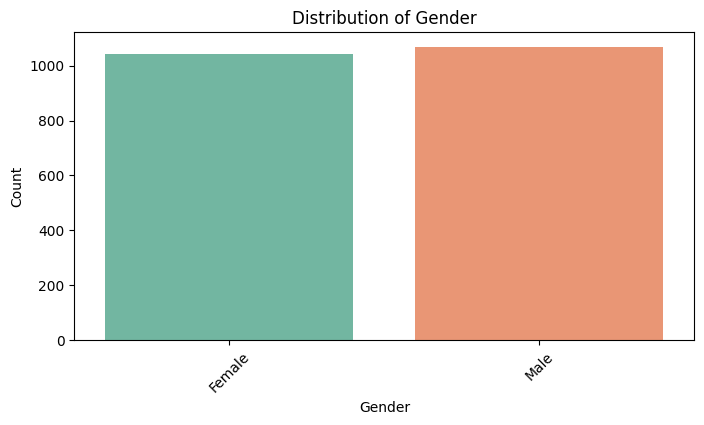

<ipython-input-12-cac46f732777>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette="Set2")


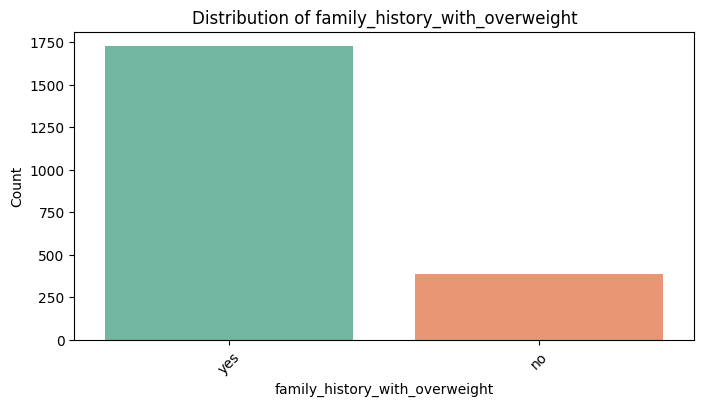

<ipython-input-12-cac46f732777>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette="Set2")


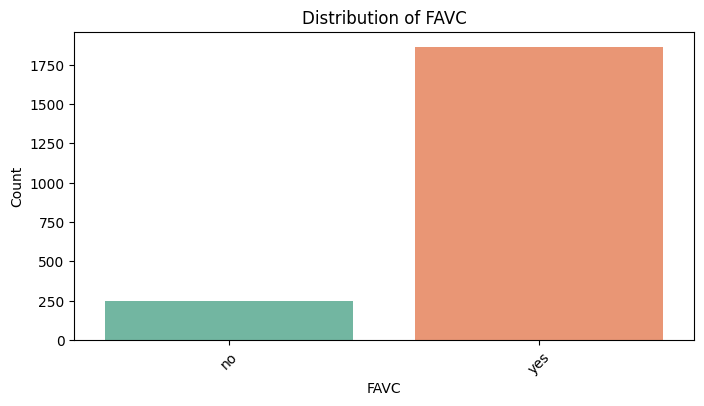

<ipython-input-12-cac46f732777>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette="Set2")


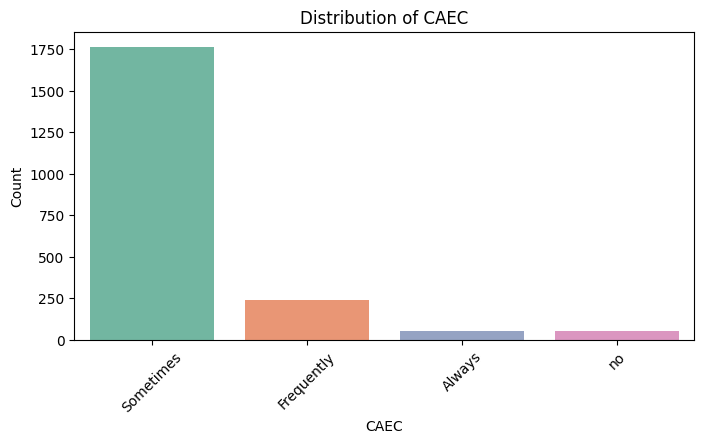

<ipython-input-12-cac46f732777>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette="Set2")


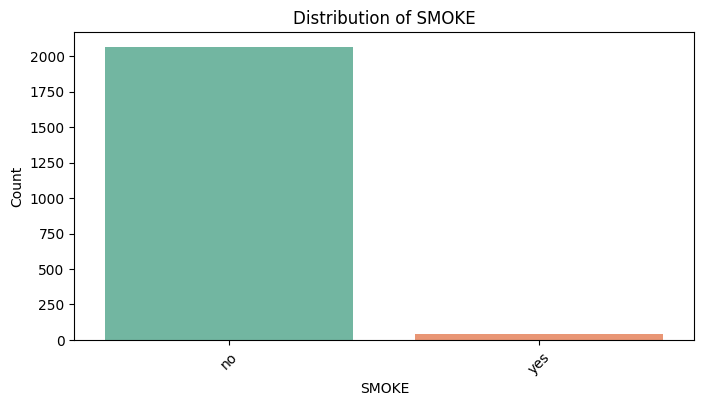

<ipython-input-12-cac46f732777>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette="Set2")


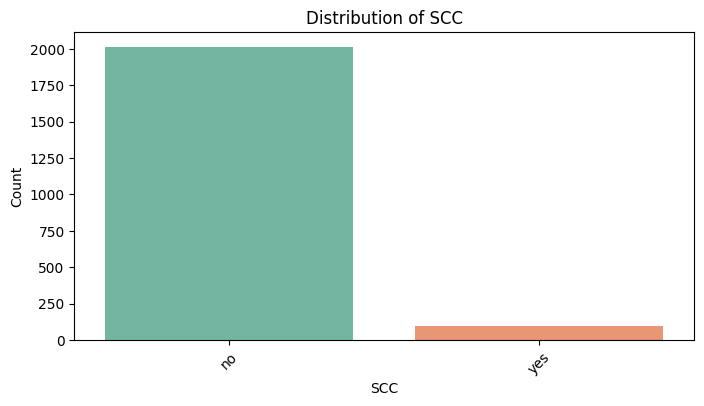

<ipython-input-12-cac46f732777>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette="Set2")


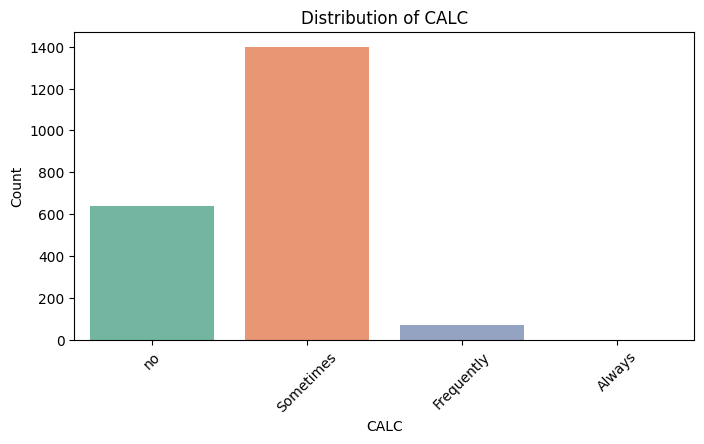

<ipython-input-12-cac46f732777>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette="Set2")


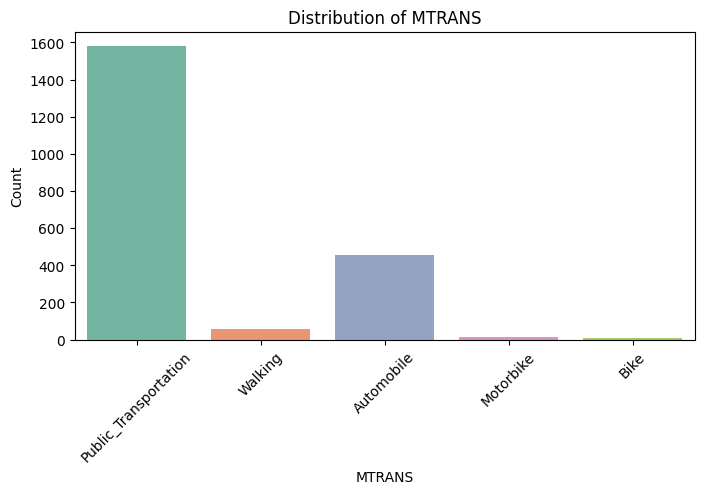

In [ ]:
# 5. Categorical Feature Analysis
categorical_features = data.select_dtypes(include=["object"]).drop("NObeyesdad", axis=1)
for column in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=column, palette="Set2")
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

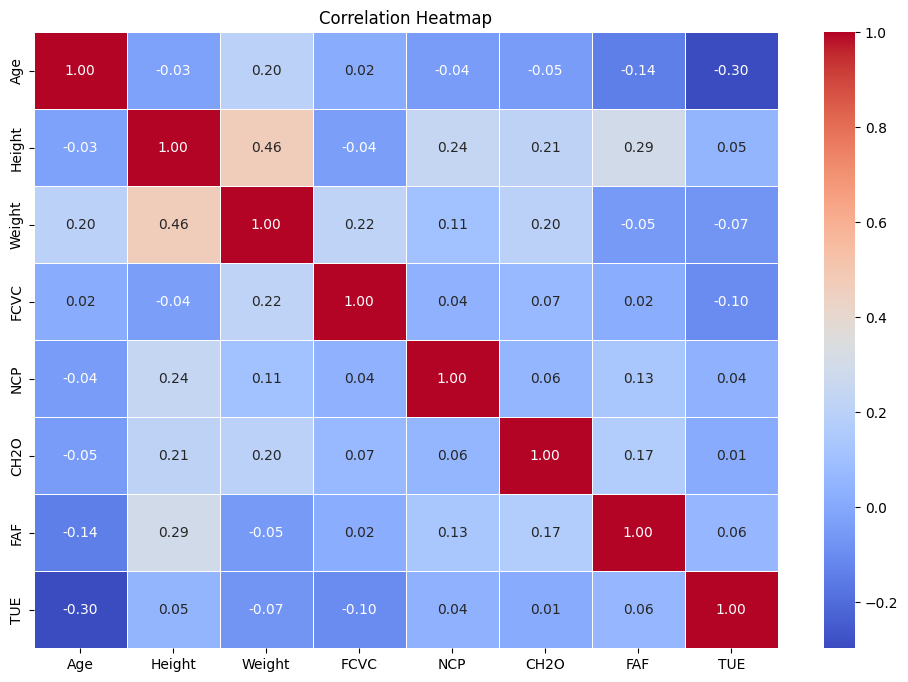

In [ ]:
# 6. Correlation Analysis
plt.figure(figsize=(12, 8))
correlation = numerical_features.corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

<ipython-input-14-ac73bf8d14d6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="NObeyesdad", y="Weight", data=data, palette="husl")


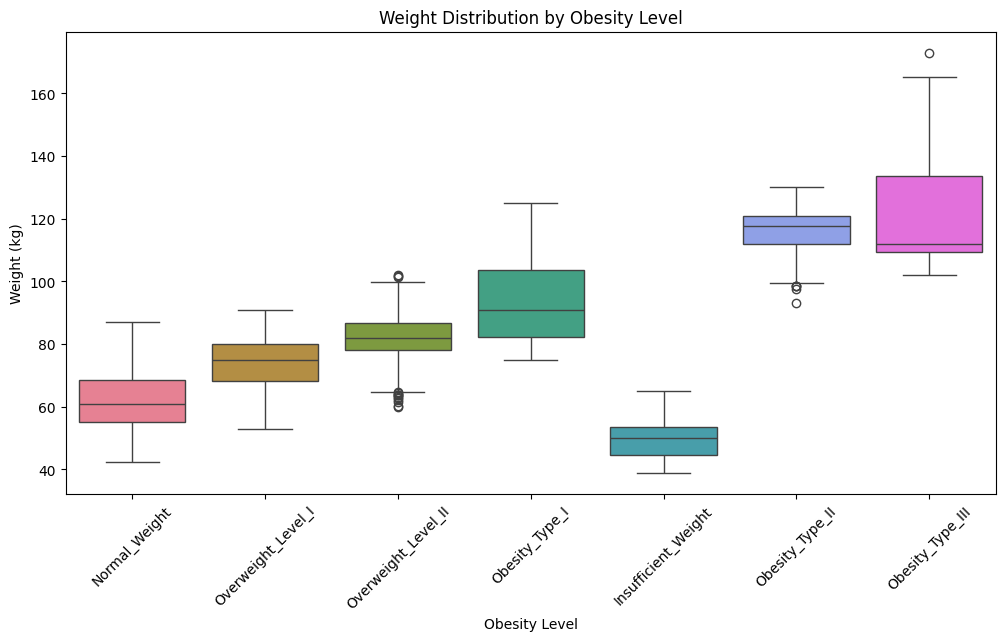

In [ ]:
# 7. Relationship Between Key Features
plt.figure(figsize=(12, 6))
sns.boxplot(x="NObeyesdad", y="Weight", data=data, palette="husl")
plt.title("Weight Distribution by Obesity Level")
plt.xlabel("Obesity Level")
plt.ylabel("Weight (kg)")
plt.xticks(rotation=45)
plt.show()

<ipython-input-15-b624423fd803>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="NObeyesdad", y="Height", data=data, palette="husl")


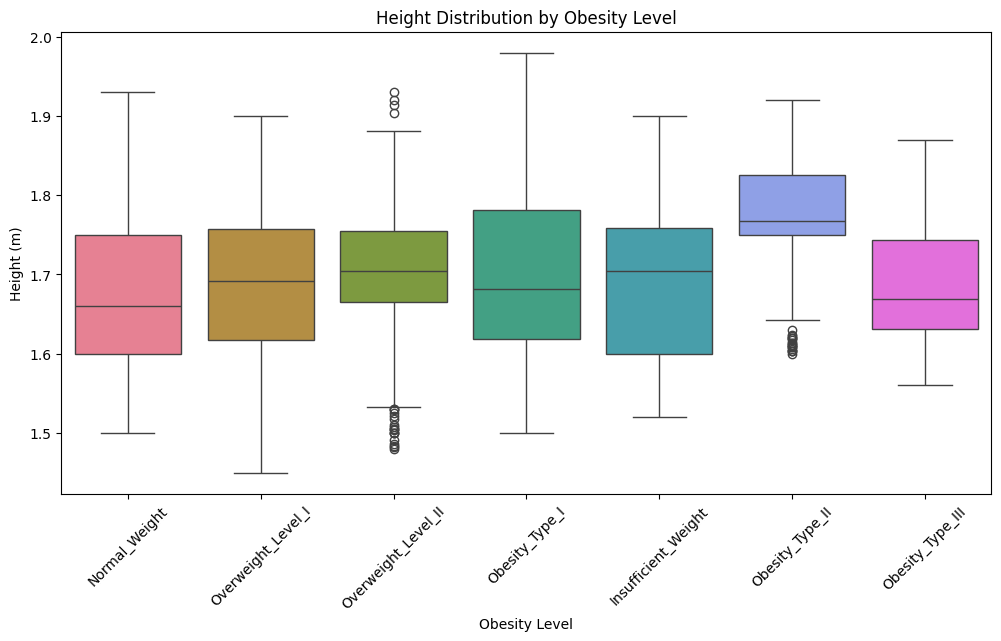

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="NObeyesdad", y="Height", data=data, palette="husl")
plt.title("Height Distribution by Obesity Level")
plt.xlabel("Obesity Level")
plt.ylabel("Height (m)")
plt.xticks(rotation=45)
plt.show()

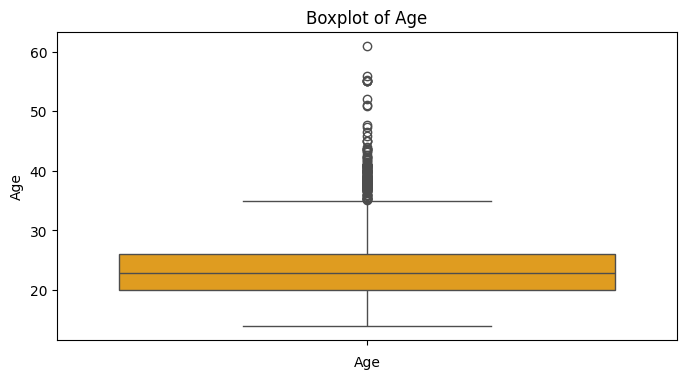

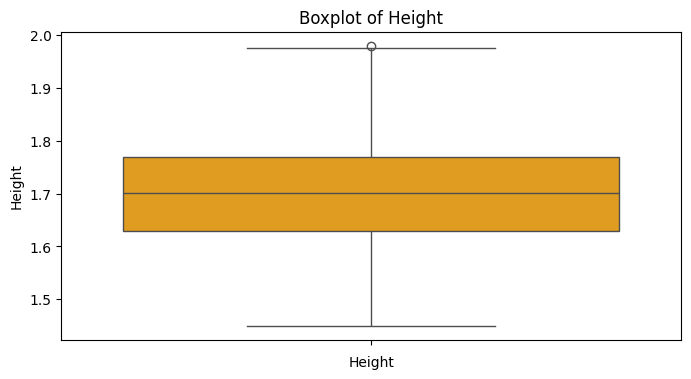

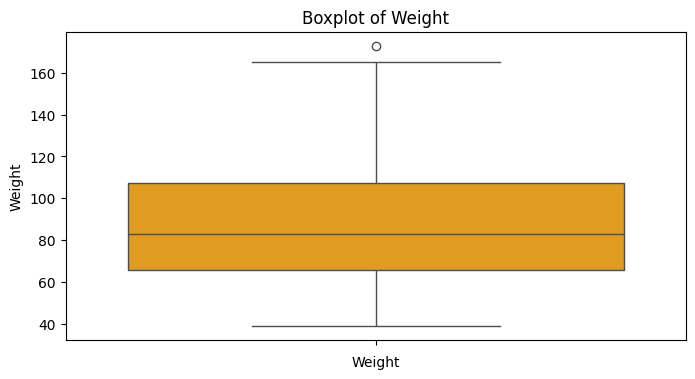

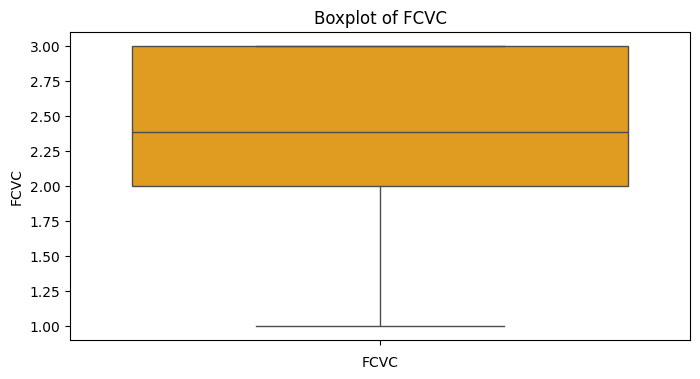

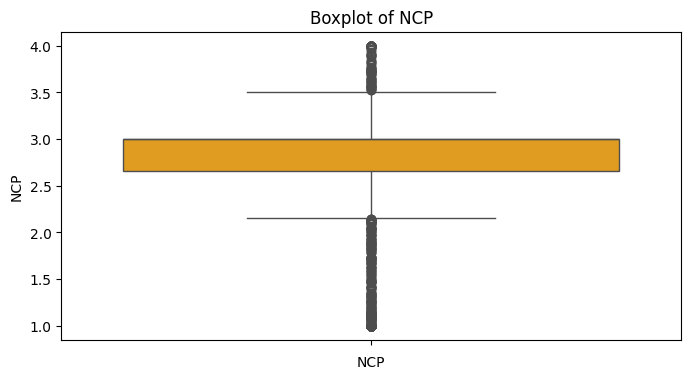

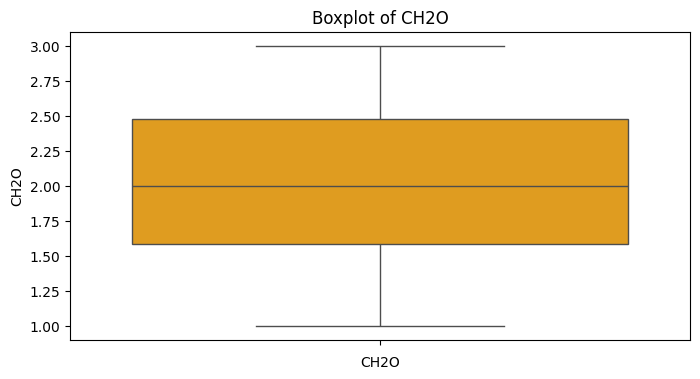

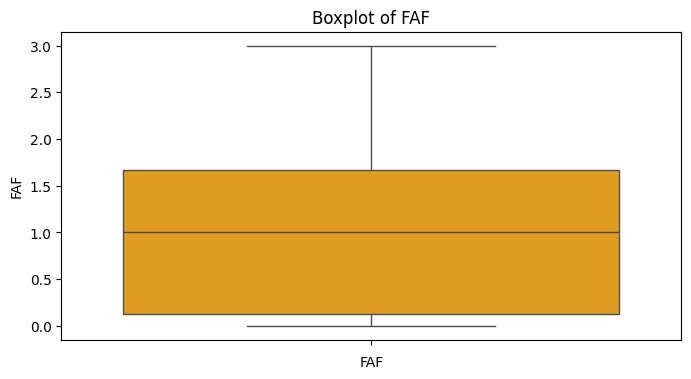

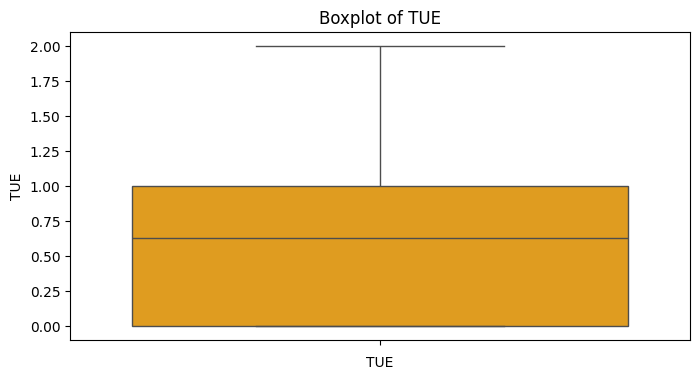

In [ ]:
# 8. Outlier Detection
for column in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data[column], color="orange")
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)
    plt.show()

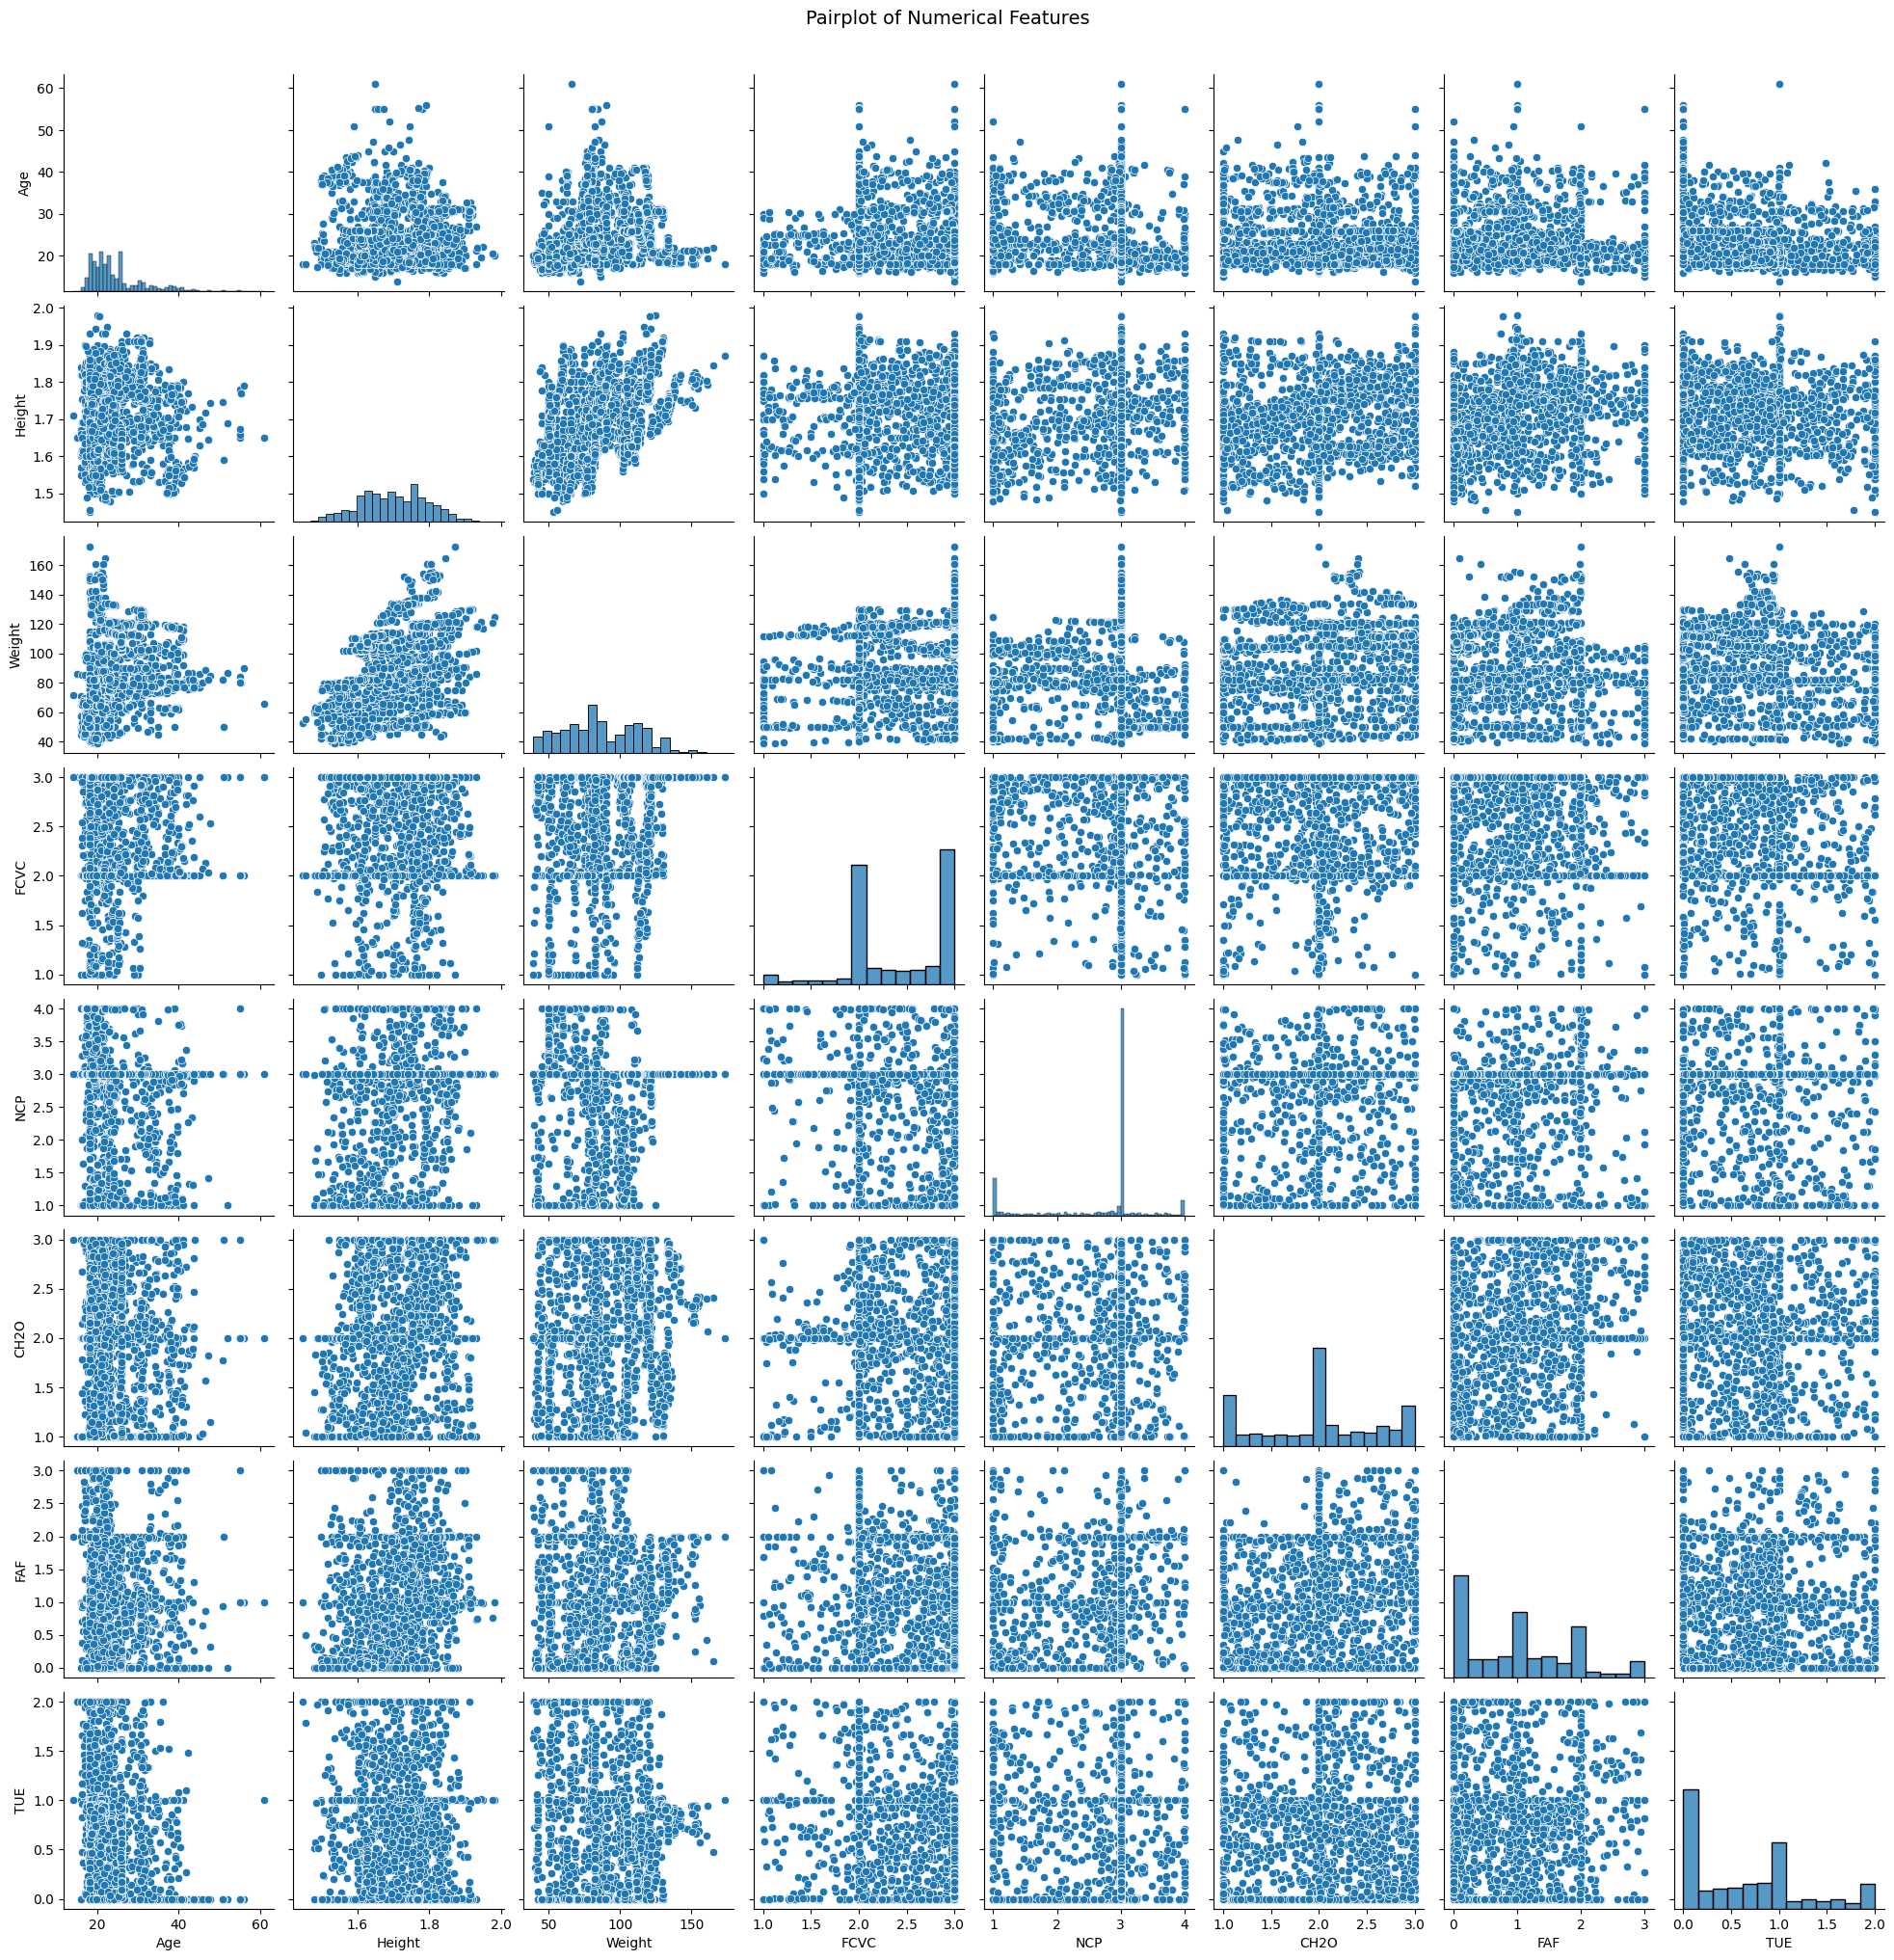

In [ ]:
# 9. Feature Interaction
sns.pairplot(data=numerical_features)
plt.suptitle("Pairplot of Numerical Features", y=1.02, fontsize=14)
plt.show()

**preprocessing**

In [6]:
# 1. Encoding Categorical Features
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [7]:
# Encoding the target variable (Label Encoding)
label_encoder = LabelEncoder()
data_encoded['NObeyesdad'] = label_encoder.fit_transform(data['NObeyesdad'])

In [8]:
# 2. Scaling Numerical Features
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
scaler = StandardScaler()
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

In [9]:
# 3. Splitting the Dataset
X = data_encoded.drop(columns=['NObeyesdad'])
y = data_encoded['NObeyesdad']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
# Display results
print("Training Set Shape:", X_train.shape)
print("Test Set Shape:", X_test.shape)

Training Set Shape: (1688, 23)
Test Set Shape: (423, 23)


**Preparation**

In [13]:
# Step 2: Encoding Categorical Features
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
target_col = 'NObeyesdad'

In [14]:
# Encode the target variable
label_encoder = LabelEncoder()
data[target_col] = label_encoder.fit_transform(data[target_col])

In [15]:
# Step 3: Preprocessing Pipeline
# Numerical and Categorical Columns
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [16]:
# Preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),                # Scale numerical features
        ('cat', OneHotEncoder(drop='first'), categorical_cols)    # One-hot encode categorical features
    ])

In [17]:
# Step 4: Train-Test Split
X = data.drop(columns=[target_col])
y = data[target_col]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [19]:
# Step 5: Apply the Preprocessing Pipeline
# Build a full pipeline with preprocessing
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [20]:
# Fit and transform the training data
X_train_prepared = pipeline.fit_transform(X_train)
X_test_prepared = pipeline.transform(X_test)

In [21]:
# Step 6: Save Processed Data (Optional)
# Convert back to a DataFrame for inspection
processed_features = pipeline.named_steps['preprocessor'].get_feature_names_out()
X_train_df = pd.DataFrame(X_train_prepared, columns=processed_features)
X_test_df = pd.DataFrame(X_test_prepared, columns=processed_features)


In [ ]:
# Save to CSV
X_train_df.to_csv('/content/drive/MyDrive/DM/X_train_prepared.csv', index=False)
X_test_df.to_csv('/content/drive/MyDrive/DM/X_test_prepared.csv', index=False)